# All the results and visualizations for the Sampta Paper

In [61]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [2]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 3076


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
2548,MASH,EnergyEfficiency,skewed,0.3,"{'knn': 2, 'page_rank': 'None', 'DTM': 'log', ...",{'42': 0.9194872322086738},{'42': 0.06062147352430555},{'42': 0.9070671515916665},{'42': 0.8821262812390946},{'42': 0.9379350854021312},{'42': 0.759932592926482},{'42': 0.9193510497083675},{'42': 0.4957638171876095},{'42': 0.28734760765564993},{'42': 0.34738952495002823},{'42': 0.25207588885189103},"{'42': {'RF-OOB': 0.9311242995518758, 'KNN_A':...","{'connection_limit': 0.0, 'threshold': 0.08592..."
1753,RF-NAMA,seeds,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.4120603015075377, '1738': 0.407035175...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.9654088050314465, '1738': 0.924528301...","{'42': 0.35, '1738': 0.35, '5271': 0.425, '920...","{'42': 0.35, '1738': 0.3, '5271': 0.5, '9209':...","{'42': 0.225, '1738': 0.25, '5271': 0.35, '920...","{'42': 0.2, '1738': 0.25, '5271': 0.3, '9209':...","{'42': 0.2238199300699301, '1738': 0.190434782...","{'42': 0.2034294558488107, '1738': 0.177616279...","{'42': 0.32072649572649575, '1738': 0.33862336...","{'42': 0.35516973656029127, '1738': 0.30997660...","{'42': {'RF-OOB': 0.9025157232704403, 'KNN_A':...",{}
2008,MASH-,Automobile,turn,0.3,"{'knn': 34, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.837871601978468, '1738': 0.8379158458...","{'42': 0.016435267592262964, '1738': 0.0164946...","{'42': 0.8114776717319921, '1738': 0.799850699...","{'42': 0.6507545810347141, '1738': 0.676361972...","{'42': 0.38046597639762136, '1738': 0.77739020...","{'42': 0.5387820407438701, '1738': 0.606759579...","{'42': 0.47216428831295176, '1738': 0.59092014...","{'42': 0.4873922620928871, '1738': 0.594429479...","{'42': 0.5214046620209701, '1738': 0.606282885...","{'42': 0.42412208150131137, '1738': 0.53926351...","{'42': 0.5648824811438545, '1738': 0.447242838...","{'42': {'RF-OOB': 0.780940261490141, 'KNN_A': ...","{'knn': 0.04083179210740188, 'page_rank': 0.00..."
2759,NAMA,CommunityCrime,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.14325750632919454, '1738': -0.145575...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.0925851272633591, '1738': 0.064764170...","{'42': -0.0029974921229374285, '1738': 0.06441...","{'42': 0.013802746986289138, '1738': 0.0565578...","{'42': -0.015854651798357544, '1738': -0.06459...","{'42': -0.013650198542610736, '1738': -0.05927...","{'42': 0.9467525505344975, '1738': 1.029005681...","{'42': 0.9457247434410668, '1738': 1.026431039...","{'42': 0.9407421878188035, '1738': 0.964641833...","{'42': 0.932830185921155, '1738': 0.9686851466...","{'42': {'RF-OOB': 0.07027510340031895, 'KNN_A'...","{'OD_method': 0.00472150074801192, 'agg_method..."
2109,RF-NAMA,ComputerHardware,skewed,0.3,"{'OD_method': 'mean', 'agg_method': 'log'}",{'42': -0.16847570336901652},{'42': 2.2893248780934502e-05},{'42': -0.1780847064338471},{'42': -0.09390348817132366},{'42': 0.18261308803419163},{'42': -0.037745517512068893},{'42': 0.06776376461800093},{'42': 1.4291062463582864},{'42': 1.3545095587984544},{'42': 1.4672651011034037},{'42': 1.268331924906691},"{'42': {'RF-OOB': -0.022797543224166494, 'KNN_...",{}


In [3]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')
cls_bl.sample(5)

,csv_file,split,A_Classification_Score,B_Classification_Score
592,chess,turn,0.928125,0.935937
628,seeds,skewed,0.850000,0.925000
666,Cancer_Data,even,0.973684,0.973684
453,zoo,skewed,0.000000,0.047619
178,seeds,skewed,0.800000,0.925000


In [4]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')
reg_bl.sample(5)


,csv_file,split,A_Classification_Score,B_Classification_Score
7,Hydrodynamics,turn,0.457007,0.457005
172,CommunityCrime,turn,0.583510,0.583510
10,OpticalNetwork,random,-0.063011,0.912762
196,Automobile,even,0.549658,0.566858
322,FacebookMetrics,turn,0.820583,0.820583


In [5]:
#This helps me to see where my tests have failed
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                                                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", "Random Forest (F1 score or RMSE) B"]:
    proc_df[columns] = [np.mean(list(d.values())) for d in proc_df[columns].values]

proc_df["Combined_Metric"] = proc_df["CE"] - proc_df["FOSCTTM"]

proc_df = proc_df.merge(pd.concat([cls_bl, reg_bl], ignore_index=True), how = "left")
#proc_df = proc_df.merge(reg_bl, how = "left")

results_df = plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579510,-0.183539,0.900176,0.355952,0.640715,0.769619,0.774758,-0.159360,-0.179408,0.900512,0.845670,0.651927,-0.355119,-0.128310,0.500979,0.827033,0.876427
1,hill_valley,0.733117,0.519168,0.734996,0.546205,0.696138,0.691129,0.744248,0.570952,0.544554,0.738520,0.641144,0.704117,0.463854,0.547286,0.729702,0.606557,0.598361
2,CommunityCrime,0.497917,-0.006658,0.793918,0.535578,0.710046,0.712440,0.329513,-0.142984,-0.208392,0.786104,0.740419,0.642807,-0.290245,-0.139376,0.535960,0.628443,0.639682
3,heart_disease,0.739134,0.556229,0.779095,0.626263,0.717172,0.717172,0.554121,0.515140,0.577778,0.766037,0.705587,0.707744,0.296210,0.693093,0.676768,0.683333,0.700000
4,Medicaldataset,0.764131,0.555572,0.773290,0.613683,0.752287,0.755764,0.659481,0.561031,0.799848,0.787405,0.705330,0.746062,0.158345,0.516046,0.958302,0.647727,0.810606
5,Automobile,0.757670,0.246401,0.882649,0.715318,0.767879,0.821432,0.817108,0.343892,0.025612,0.881048,0.804208,0.723512,-0.139808,0.795496,0.856611,0.862563,0.839518
6,audiology,0.717747,0.526252,0.864377,0.714571,0.775679,0.753457,0.725285,0.504321,0.336842,0.861876,0.805604,0.751994,0.111884,0.805357,0.749474,0.763158,0.763158
7,heart_failure,0.774903,0.699666,0.826655,0.749164,0.779698,0.770797,0.720613,0.658863,0.745819,0.830920,0.773136,0.737124,0.422953,0.727162,0.890970,0.816667,0.833333
8,ConcreteSlumpTest,0.513335,0.447216,0.890893,0.623485,0.780732,0.751162,0.669869,0.123935,-0.034983,0.816872,0.875523,0.406828,-0.171756,0.852770,0.766478,0.781249,0.840009
9,hepatitis,0.784776,0.671014,0.803720,0.760870,0.780923,0.789388,0.653340,0.695652,0.586957,0.778977,0.758580,0.761720,0.289319,0.755093,0.814493,0.678571,0.750000


In [6]:
# Expand the Grae Column
grae_expanded = pd.json_normalize(proc_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
proc_df = proc_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)

#Create classification and regression dataframes
classification_df = proc_df[proc_df['csv_file'].isin(cls_bl['csv_file'].unique())]
regression_df = proc_df[proc_df['csv_file'].isin(reg_bl['csv_file'].unique())]

/tmp/ipykernel_1192671/316710054.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()


# Visualizations

In [7]:
results_df.columns

Index(['csv_file', 'SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'],
      dtype='object')

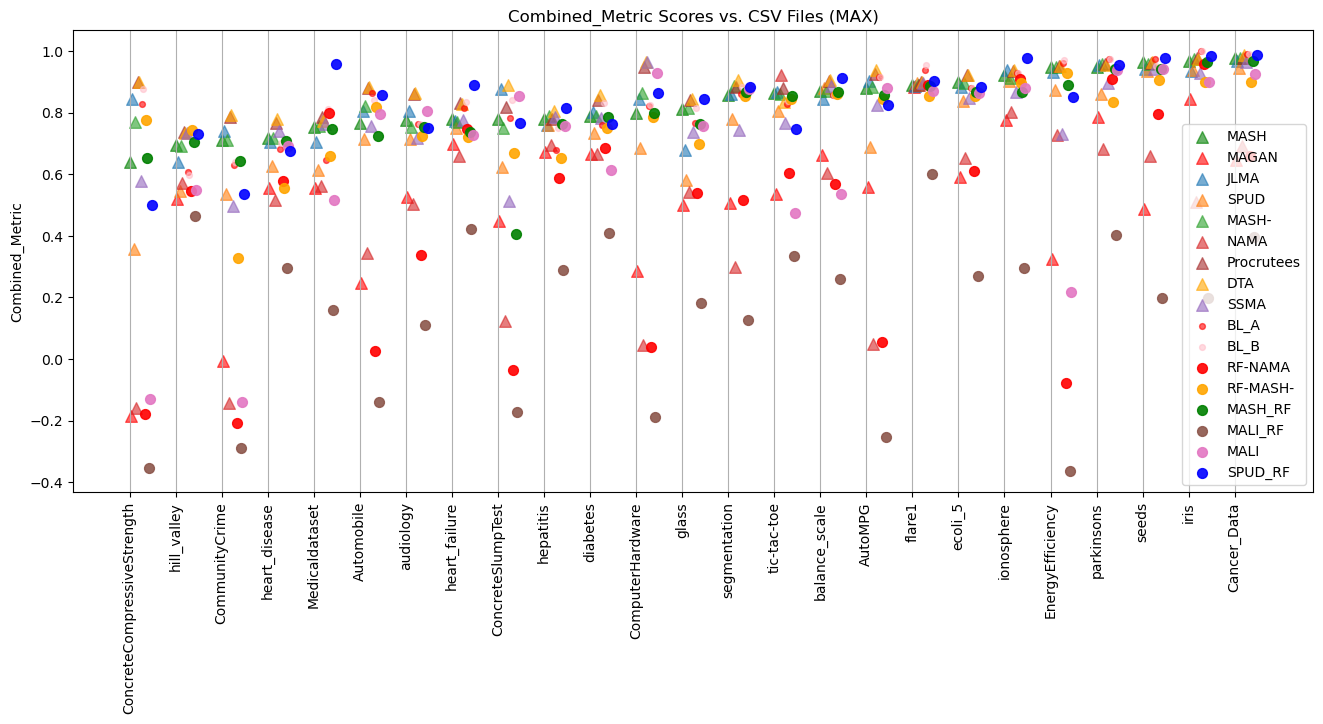

In [8]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

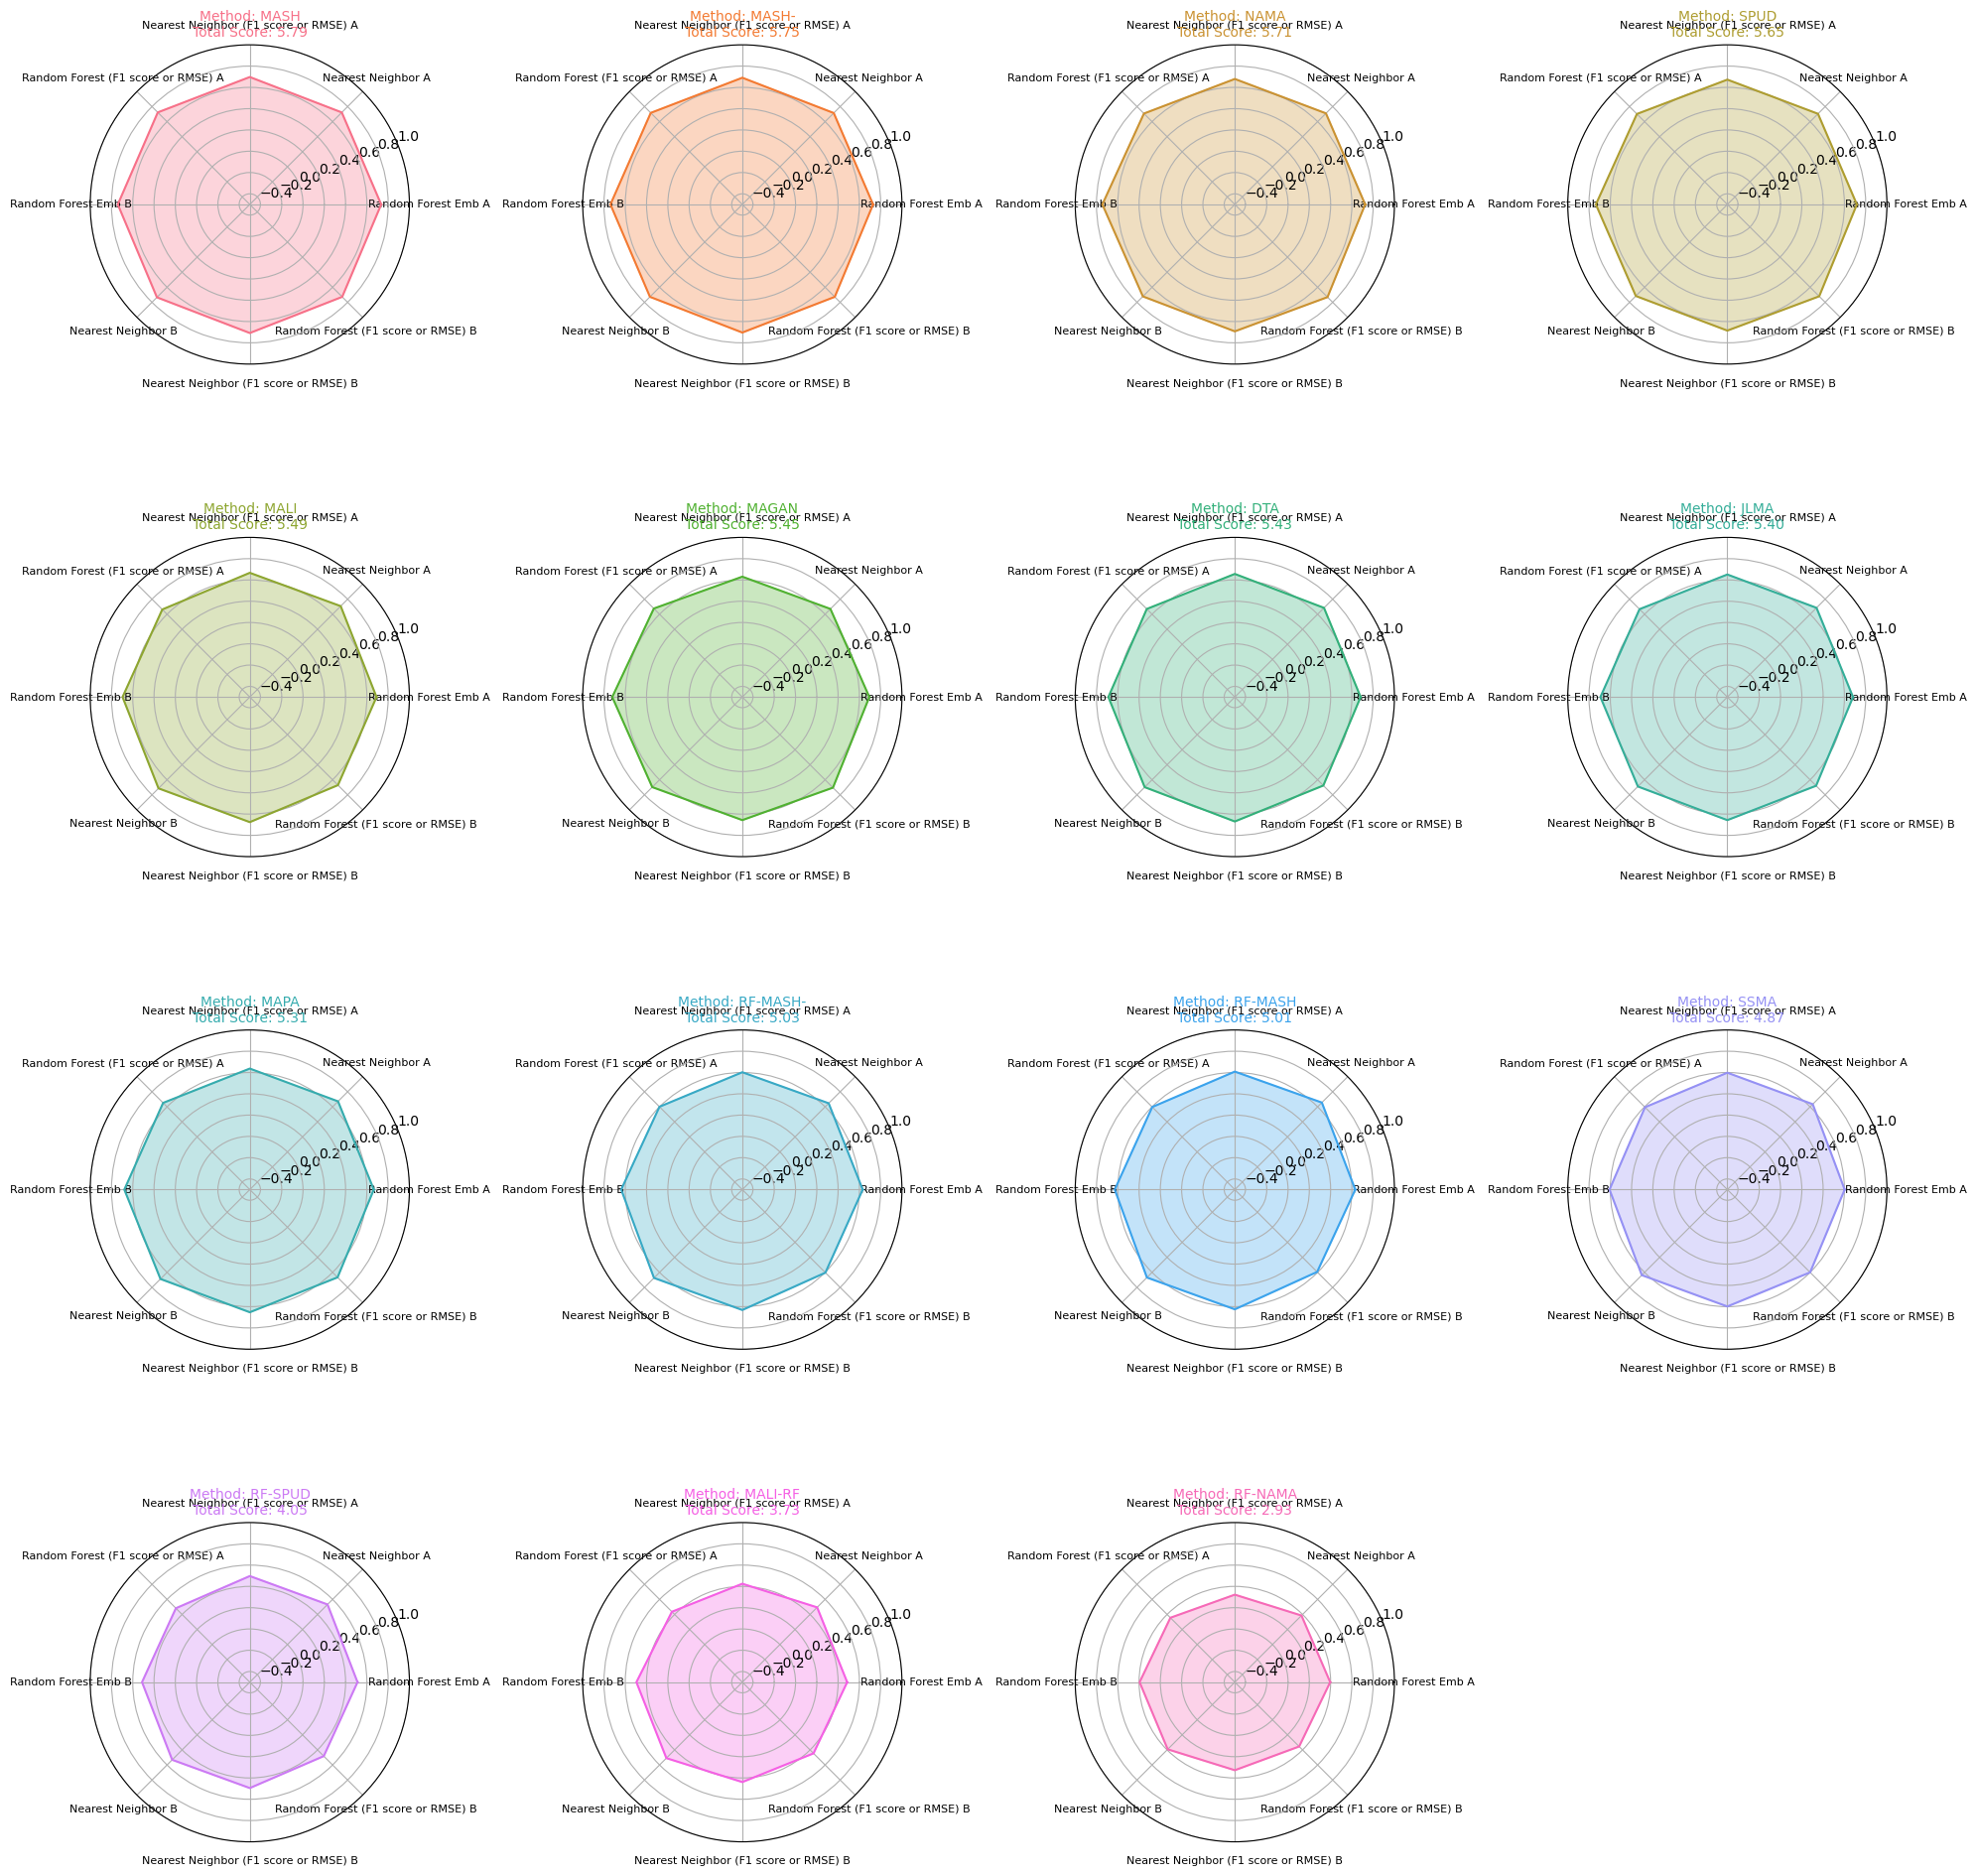

In [9]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

In [10]:
# Rank each column's scores in results_df against each other
ranked_df = results_df.copy().set_index('csv_file').T
for col in ranked_df.columns:
    ranked_df[col] = ranked_df[col].rank(ascending=False)
ranked_df = ranked_df.T.reset_index()

ranked_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,10.0,16.0,2.0,12.0,9.0,7.0,6.0,14.0,15.0,1.0,4.0,8.0,17.0,13.0,11.0,5.0,3.0
1,hill_valley,4.0,16.0,3.0,14.0,7.0,8.0,1.0,12.0,15.0,2.0,9.0,6.0,17.0,13.0,5.0,10.0,11.0
2,CommunityCrime,11.0,13.0,1.0,10.0,5.0,4.0,12.0,15.0,16.0,2.0,3.0,6.0,17.0,14.0,9.0,8.0,7.0
3,heart_disease,3.0,14.0,1.0,12.0,4.5,4.5,15.0,16.0,13.0,2.0,7.0,6.0,17.0,9.0,11.0,10.0,8.0
4,Medicaldataset,6.0,15.0,5.0,13.0,8.0,7.0,11.0,14.0,3.0,4.0,10.0,9.0,17.0,16.0,1.0,12.0,2.0
5,Automobile,11.0,15.0,1.0,13.0,10.0,6.0,7.0,14.0,16.0,2.0,8.0,12.0,17.0,9.0,4.0,3.0,5.0
6,audiology,12.0,14.0,1.0,13.0,5.0,8.0,11.0,15.0,16.0,2.0,3.0,9.0,17.0,4.0,10.0,6.5,6.5
7,heart_failure,7.0,15.0,4.0,10.0,6.0,9.0,14.0,16.0,11.0,3.0,8.0,12.0,17.0,13.0,1.0,5.0,2.0
8,ConcreteSlumpTest,12.0,13.0,1.0,11.0,7.0,9.0,10.0,15.0,16.0,5.0,2.0,14.0,17.0,3.0,8.0,6.0,4.0
9,hepatitis,4.0,14.0,2.0,8.0,5.0,3.0,15.0,12.0,16.0,6.0,9.0,7.0,17.0,10.0,1.0,13.0,11.0


<Axes: >

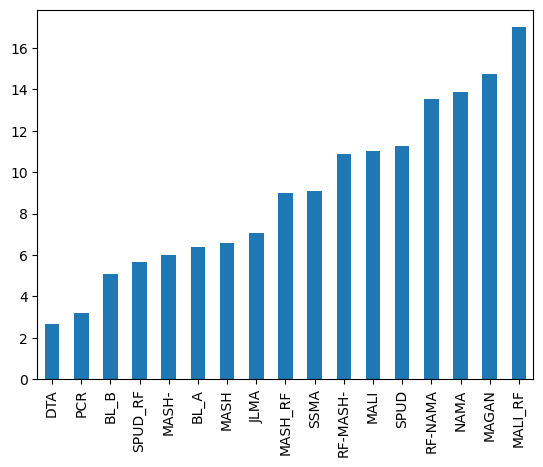

In [11]:
ranked_df.drop(columns= ["csv_file"]).mean().sort_values().plot(kind="bar")

# Helpful data frames


Baseline Scores and their meaning: (Adam doesn't think you should worry too much about these... he can work on these visualizations if they are even wanted)
- A_Classification_Score: Doesn't use an embedding at all. Is simply a KNN set to 4 which uses a train test split of 0.8 to predict on domain A.
- B_Classification_Score: Same thing as A but for B. 

Scores and their meanings
- Random Forest OOB: Is the OOB score from the RF trained against the full embedding (No training or test splits)
- Random Forest Emb A/B: The embedding is calculated with all of the points (No test or train). Then the embedding is split into a train/test. Uses data from both domains to predict points only from domain A or B using a RF algorthim (and is that score).
- Nearest Neighbor A/B: The embedding is calculated with all the points (no test or train). The embedding is then split into a train /test with equal representation from both domains. It uses all of the train data to predict on just one of the test A/B using the KNN algorithm where k = 1/30 of the dataset length. 
- NN (f1 score or RMSE): Depending on data set type, (regression or classification) its either the f1 score or RMSE. These are calculated with the same model as the Nearest Neighbor model from above. 
- RF (F1 score or RMSE): Exact same as the NN one, but using the random Forest model from above.

GRAE Scores and their meanings
- Same structure as the above scores. (The ones labeled as Metric are the F1 or RMSE scores).
- Instead of having the embedding trained on both the test and train data like the above, the embedding is only using the train data
- The Test data is then passed through GRAE networks to make the predictions. 
- This is more "Fair" and less "cheaty" than the above, because the tests points are never seen before the scoring.

In [12]:
proc_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb A', 'Random Forest Emb B',
       'Nearest Neighbor A', 'Nearest Neighbor B',
       'Nearest Neighbor (F1 score or RMSE) A',
       'Nearest Neighbor (F1 score or RMSE) B',
       'Random Forest (F1 score or RMSE) A',
       'Random Forest (F1 score or RMSE) B', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN-metric_A',
       'Grae-KNN-metric_B', 'Grae-KNN_A', 'Grae-KNN_B', 'Grae-RF-OOB',
       'Grae-RF-metric_A', 'Grae-RF-metric_B', 'Grae-RF_A', 'Grae-RF_B'],
      dtype='object')

In [13]:
# All the data
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
10154,SPUD,ionosphere,even,0.3,0.863248,0.000008,0.907143,0.873239,0.985915,0.873239,...,0.859155,0.867107,0.914121,0.873239,0.915493,0.898214,0.914121,0.971831,0.915493,0.971831
10666,MALI-RF,EnergyEfficiency,skewed,0.3,-0.249044,0.251773,-0.134483,-0.012857,-0.097950,-0.015190,...,0.970072,1.030102,1.019984,-0.036440,-0.016180,-0.121701,1.003260,1.003732,0.016871,0.015946
4680,SPUD,iris,skewed,0.3,0.940000,0.000444,0.854167,0.800000,1.000000,0.733333,...,1.000000,0.767251,1.000000,0.766667,1.000000,0.816667,0.796623,1.000000,0.800000,1.000000
7413,RF-MASH,parkinsons,skewed,0.3,0.830769,0.062078,0.916667,0.871795,0.948718,0.846154,...,0.974359,0.814990,0.879940,0.820513,0.897436,0.891026,0.846154,0.879940,0.846154,0.897436
10915,MASH-,ComputerHardware,distort,0.3,0.852191,0.017802,0.777315,0.727834,0.767310,0.698297,...,0.803881,0.820833,0.866457,0.656935,0.617846,0.666680,0.722574,0.758629,0.729391,0.693428


In [ ]:
classification_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
14807,SPUD,flare1,distort,0.3,0.887926,0.001062,0.884884,0.861538,0.883077,0.886154,...,0.923077,0.819420,0.819420,0.876923,0.876923,0.874419,0.837493,0.839637,0.883077,0.886154
3650,RF-MASH-,glass,turn,0.3,0.759813,0.060374,0.760819,0.548837,0.558140,0.586047,...,0.744186,0.711424,0.689397,0.748837,0.725581,0.752047,0.689862,0.691139,0.711628,0.725581
3249,MASH,ionosphere,turn,0.3,0.920798,0.000101,0.885357,0.876056,0.884507,0.873239,...,0.873239,0.868956,0.856868,0.873239,0.859155,0.894643,0.851181,0.801245,0.859155,0.816901
9478,RF-SPUD,audiology,skewed,0.3,0.242105,0.001634,0.526316,0.236842,0.289474,0.289474,...,0.605263,0.198587,0.405742,0.263158,0.500000,0.523026,0.344399,0.540050,0.421053,0.631579
10633,MASH-,segmentation,random,0.3,0.600948,0.165113,0.682143,0.548837,0.562791,0.562791,...,0.744186,0.463461,0.477444,0.483721,0.488372,0.676786,0.482819,0.494522,0.488372,0.493023


In [15]:
regression_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
1707,MALI-RF,Automobile,even,0.3,0.009474,0.149282,-0.004982,-0.461127,-0.310647,-0.133058,...,0.566858,0.564859,0.518310,0.380518,0.478412,0.152480,0.615053,0.658676,0.265529,0.157650
1669,RF-MASH-,CommunityCrime,distort,0.3,0.495827,0.405465,0.212316,0.168079,0.159489,0.023938,...,0.597383,0.605066,0.605685,0.585018,0.584193,0.662887,0.592975,0.591191,0.601410,0.603707
775,DTA,AutoMPG,distort,0.3,0.902245,0.013231,0.544856,0.427058,0.433319,0.550781,...,0.874756,1.045000,0.547204,-0.303583,0.642442,0.909894,1.153887,0.703316,-0.589776,0.408121
3013,MALI,CommunityCrime,random,0.3,-0.251043,0.085395,-0.056001,-0.053355,-0.036559,-0.005306,...,0.534489,0.919378,0.918261,0.041804,0.044147,-0.035746,0.984445,0.981296,-0.099295,-0.092577
12964,SPUD,EnergyEfficiency,skewed,0.3,0.742706,0.000481,0.767159,0.735568,0.899963,0.184901,...,0.958346,0.907711,0.362326,0.195217,0.871772,0.745947,0.640007,0.311587,0.599914,0.905171


# Marshall's Visualizations

### Story number one: How close GRAE's Out of Bag Score is to the Model's

(18, 4)


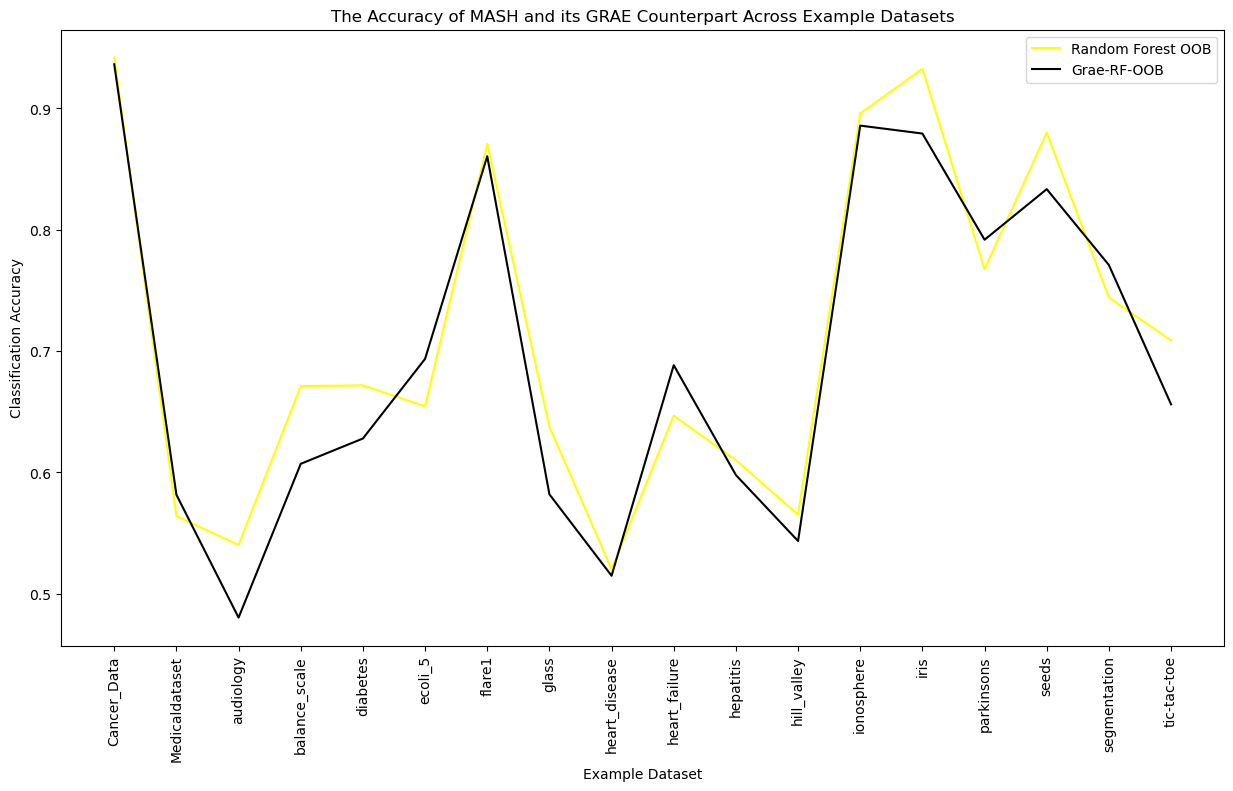

In [60]:
# Collect the average domain scores and the out of bag scores both with and without GRAE
mash_random_scores = subset_df(classification_df, method = "MASH", split = "random")
important_scores = mash_random_scores[["csv_file", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby("csv_file").mean()
print(averaged_scores.shape)

# Plot the A_Classification_Score for each csv_file
plt.figure(figsize=(15, 8))
#plt.plot(averaged_scores.index, averaged_scores["A_Classification_Score"], color='red')
#plt.plot(averaged_scores.index, averaged_scores["B_Classification_Score"], color='blue')
plt.plot(averaged_scores.index, averaged_scores["Random Forest OOB"], color='yellow')
plt.plot(averaged_scores.index, averaged_scores["Grae-RF-OOB"], color='black')
plt.title('The Accuracy of MASH and its GRAE Counterpart Across Example Datasets')
plt.xlabel('Example Dataset')
plt.ylabel('Classification Accuracy')
plt.xticks(rotation=90)
plt.legend(['Random Forest OOB', 'Grae-RF-OOB'])
plt.show()

### Story Number Two: How GRAE's Accuracy Changes Acress Models, Datasets, and Split Types

(75, 4)


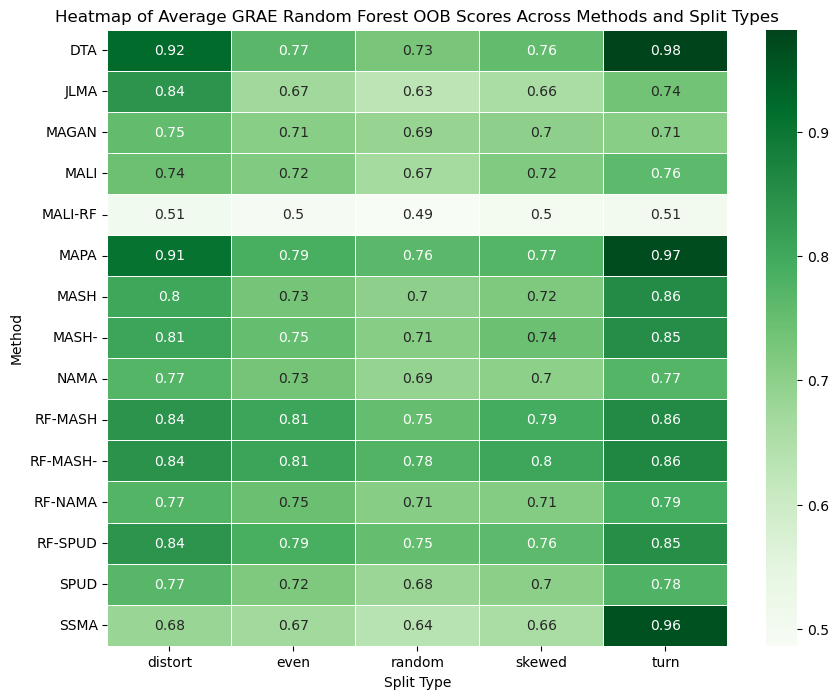

In [73]:
mash_random_scores = subset_df(classification_df)
important_scores = mash_random_scores[["method", "split", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
print(averaged_scores.shape)

# Set the size of the plot
plt.figure(figsize=(10, 8))

data = averaged_scores["Grae-RF-OOB"].unstack()
 
# Create the heatmap
sns.heatmap(data, annot=True, cmap='Greens', linewidths=.5)
plt.title('Heatmap of Average GRAE Random Forest OOB Scores Across Methods and Split Types')
plt.xlabel('Split Type')
plt.ylabel('Method')
plt.show()